# 1. Importing All Important Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor


%matplotlib inline

# 2. Reading The CSV file

In [2]:
data = pd.read_csv('Delhi 2019.csv',na_values='None',parse_dates=True)
data.head()

,From Date,To Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Benzene
0,01-01-2019 00:00,01-01-2019 01:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40,6.08
1,01-01-2019 01:00,01-01-2019 02:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70,9.93
2,01-01-2019 02:00,01-01-2019 03:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42,9.97
3,01-01-2019 03:00,01-01-2019 04:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98,8.70
4,01-01-2019 04:00,01-01-2019 05:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50,7.43


#### We can see there is 8 pollutants and Two datetime. So can remove all date and also the Benzene column , because Benzene is not in the Indian Aqi Table

In [3]:
data.drop(columns=['To Date','Benzene'],inplace=True)
data.head()

,From Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
0,01-01-2019 00:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40
1,01-01-2019 01:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70
2,01-01-2019 02:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42
3,01-01-2019 03:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98
4,01-01-2019 04:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50


In [4]:
data.rename(columns={"From Date":"Date"},inplace=True)
data.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
0,01-01-2019 00:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40
1,01-01-2019 01:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70
2,01-01-2019 02:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42
3,01-01-2019 03:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98
4,01-01-2019 04:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
Date     8760 non-null object
PM2.5    8267 non-null float64
PM10     8291 non-null float64
NO2      8306 non-null float64
NH3      8077 non-null float64
SO2      8251 non-null float64
CO       7919 non-null float64
Ozone    8086 non-null float64
dtypes: float64(7), object(1)
memory usage: 547.6+ KB


In [6]:
data['Date']= pd.to_datetime(data['Date'])


#### Setting the Date column to Index

In [7]:
data = data.set_index(data['Date'])
data.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
Date,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40
2019-01-01 01:00:00,2019-01-01 01:00:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70
2019-01-01 02:00:00,2019-01-01 02:00:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42
2019-01-01 03:00:00,2019-01-01 03:00:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98
2019-01-01 04:00:00,2019-01-01 04:00:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50


#### After setting 'Date' as index We can remove the 'Date' column

In [8]:
data.drop(columns=['Date'],inplace=True)
data.head()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
Date,,,,,,,
2019-01-01 00:00:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40
2019-01-01 01:00:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70
2019-01-01 02:00:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42
2019-01-01 03:00:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98
2019-01-01 04:00:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 7 columns):
PM2.5    8267 non-null float64
PM10     8291 non-null float64
NO2      8306 non-null float64
NH3      8077 non-null float64
SO2      8251 non-null float64
CO       7919 non-null float64
Ozone    8086 non-null float64
dtypes: float64(7)
memory usage: 547.5 KB


# 3. Handling Null Value

##### Checking total number of null value in each column

In [10]:
data.isnull().sum()

PM2.5    493
PM10     469
NO2      454
NH3      683
SO2      509
CO       841
Ozone    674
dtype: int64

In [11]:
data.dropna(how='all',axis=0,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8382 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 7 columns):
PM2.5    8267 non-null float64
PM10     8291 non-null float64
NO2      8306 non-null float64
NH3      8077 non-null float64
SO2      8251 non-null float64
CO       7919 non-null float64
Ozone    8086 non-null float64
dtypes: float64(7)
memory usage: 523.9 KB


##### again checking remaining null value

In [13]:
data.isnull().sum()

PM2.5    115
PM10      91
NO2       76
NH3      305
SO2      131
CO       463
Ozone    296
dtype: int64

# 4. Filling Missing Value

##### Filling all missing value by using the ffill method

In [14]:
data.fillna(method='ffill',inplace=True)

##### checking how many nul values are remain

In [15]:
data.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NH3      0
SO2      0
CO       0
Ozone    0
dtype: int64

##### Here we can see that all the null value are filled by its previous value, so there is no null value anymore

# 5. Describing the dataset

In [16]:
data.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone
count,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000,8382.000000
mean,106.311062,200.152887,54.490583,27.084876,22.482634,0.876225,33.860778
std,100.626765,152.765342,27.839391,13.230279,16.088269,0.737304,34.597256
min,2.500000,1.500000,3.000000,0.280000,0.100000,0.010000,0.100000
25%,38.500000,85.000000,33.772500,18.420000,11.585000,0.450000,5.380000
50%,70.500000,159.000000,48.380000,23.950000,17.800000,0.700000,21.790000
75%,140.750000,276.750000,69.795000,32.615000,27.900000,1.070000,53.230000
max,992.000000,991.000000,236.450000,146.430000,176.450000,9.500000,194.900000


# 6. Creating The Dataset By Calculating 'AQI'

##### Calculating Sub Index of Each and Every Pollutants

### A. Function to calculate PM2.5 individual pollutant index(PMI2_5)

In [17]:
def calculate_PMI2_5(PM):
    PMI2_5=0
    if (PM<=12.0):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,12.0
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
     
    if (PM>12.0 and PM<=35.4):
        Ilo,Ihi,BPlo,BPhi=51,100,12.1,35.4
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
     
    if (PM>35.4 and PM<=55.4):
        Ilo,Ihi,BPlo,BPhi=101,150,35.5,55.4
        
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo

    if (PM>55.4 and PM<=150.4):
        Ilo,Ihi,BPlo,BPhi=151,200,55.5,150.4
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        
    if (PM>150.4 and PM<=250.4):
        Ilo,Ihi,BPlo,BPhi=201,300,150.5,250.4
        
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        
    if (PM>250.4 and PM<=350.4):
        Ilo,Ihi,BPlo,BPhi=301,400,250.5,350.4
        
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        
    if (PM>350.4 and PM<=504.4):
        Ilo,Ihi,BPlo,BPhi=401,500,350.5,504.4
        
        
        PMI2_5 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
    
    return round(PMI2_5)
data['PMI2_5']=data['PM2.5'].apply(calculate_PMI2_5)
df= data[['PM2.5','PMI2_5']]
df.head()

,PM2.5,PMI2_5
Date,,
2019-01-01 00:00:00,361.5,408
2019-01-01 01:00:00,348.0,398
2019-01-01 02:00:00,298.0,348
2019-01-01 03:00:00,276.5,327
2019-01-01 04:00:00,295.0,345


### B. Function to calculate PM10 individual pollutant index(PMI10)

In [18]:
def calculate_PMI10(PM):
    PMI10=0
    if (PM<=54.0):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,54.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
     
    if (PM>54.0 and PM<=154.0):
        Ilo,Ihi,BPlo,BPhi=51,100,55.0,154.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
     
    if (PM>154.0 and PM<=254.0):
        Ilo,Ihi,BPlo,BPhi=101,150,155.0,254.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo

    if (PM>254.0 and PM<=354.0):
        Ilo,Ihi,BPlo,BPhi=151,200,255.0,354.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        

    if (PM>354.0 and PM<=424.0):
        Ilo,Ihi,BPlo,BPhi=201,300,350.0,424.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        
    if (PM>424.0 and PM<=504.0):
        Ilo,Ihi,BPlo,BPhi=301,400,425.0,504.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
        
    if (PM>504.0 and PM<=1004.0):
        Ilo,Ihi,BPlo,BPhi=401,500,505.0,1004.0
        PMI10 = (((Ihi-Ilo)*(PM-BPlo))/(BPhi-BPlo))+Ilo
    
    return round(PMI10)
data['PMI10']=data['PM10'].apply(calculate_PMI10)
df= data[['PM10','PMI10']]
df.head()

,PM10,PMI10
Date,,
2019-01-01 00:00:00,525.5,405
2019-01-01 01:00:00,514.0,403
2019-01-01 02:00:00,466.5,353
2019-01-01 03:00:00,429.5,307
2019-01-01 04:00:00,435.5,314


### C.Function to calculate NO2 individual pollutant index(NI)

In [19]:
def calculate_NI(NO2):
    NI=0
    if (NO2<=53.0):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,53.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
     
    if (NO2>53.0 and NO2<=100.0):
        Ilo,Ihi,BPlo,BPhi=51,100,54.0,100.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
     
    if (NO2>100.0 and NO2<=360.0):
        Ilo,Ihi,BPlo,BPhi=101,150,101.0,360.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo

    if (NO2>360.0 and NO2<=649.0):
        Ilo,Ihi,BPlo,BPhi=151,200,361.0,649.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
        

    if (NO2>649.0 and NO2<=1249.0):
        Ilo,Ihi,BPlo,BPhi=201,300,650.0,1249.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
        
    if (NO2>1549.0 and NO2<=1649.0):
        Ilo,Ihi,BPlo,BPhi=301,400,1250.0,1649.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
        
    if (NO2>1649.0 and NO2<=2049.0):
        Ilo,Ihi,BPlo,BPhi=401,500,1650.0,2049.0
        
        NI = (((Ihi-Ilo)*(NO2-BPlo))/(BPhi-BPlo))+Ilo
    
    return round(NI)
data['NI']=data['NO2'].apply(calculate_NI)
df= data[['NO2','NI']]
df.head()

,NO2,NI
Date,,
2019-01-01 00:00:00,156.90,112
2019-01-01 01:00:00,142.12,109
2019-01-01 02:00:00,121.45,105
2019-01-01 03:00:00,113.48,103
2019-01-01 04:00:00,108.18,102


### D. Function to calculate NH3 individual pollutant index(NHI)

In [20]:
def calculate_NHI(NH3):
    NHI=0
    if (NH3<=200):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,200.0
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo
     
    if (NH3>200 and NH3<=400):
        Ilo,Ihi,BPlo,BPhi=51,100,201.0,400.0
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo
     
    if (NH3>400 and NH3<=800):
        Ilo,Ihi,BPlo,BPhi=101,200,401,800
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo

    if (NH3>800 and NH3<=1200):
        Ilo,Ihi,BPlo,BPhi=201,300,801,1200
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo
        
    if (NH3>1200 and NH3<=1800):
        Ilo,Ihi,BPlo,BPhi=301,400,1201,1800
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo
        
    if (NH3>1800):
        Ilo,Ihi,BPlo,BPhi=401,500,1801,2400
        
        NHI = (((Ihi-Ilo)*(NH3-BPlo))/(BPhi-BPlo))+Ilo
        
    
    return round(NHI)
data['NHI']=data['NH3'].apply(calculate_NHI)
df= data[['NH3','NHI']]
df.head()

,NH3,NHI
Date,,
2019-01-01 00:00:00,62.50,16
2019-01-01 01:00:00,57.52,14
2019-01-01 02:00:00,52.55,13
2019-01-01 03:00:00,53.95,13
2019-01-01 04:00:00,53.20,13


### E. Function to calculate SO2 individual pollutant index(SI)

In [21]:
def calculate_si(SO2):
    SI=0
    if (SO2<=35):
        Ilo,Ihi,BPlo,BPhi=0,50,0,35
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
     
    if (SO2>35 and SO2<=75):
        Ilo,Ihi,BPlo,BPhi=51,100,36,75
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
     
    if (SO2>75 and SO2<=185):
        Ilo,Ihi,BPlo,BPhi=101,150,76,185
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo

    if (SO2>185 and SO2<=304):
        Ilo,Ihi,BPlo,BPhi=151,200,186,304
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
        

    if (SO2>304 and SO2<=604):
        Ilo,Ihi,BPlo,BPhi=201,300,305,604
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
        
    if (SO2>604 and SO2<=804):
        Ilo,Ihi,BPlo,BPhi=301,400,605,804
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
        
    if (SO2>804 and SO2<=1004):
        Ilo,Ihi,BPlo,BPhi=401,500,805,1004
        
        SI = (((Ihi-Ilo)*(SO2-BPlo))/(BPhi-BPlo))+Ilo
    
    return round(SI)
data['SI']=data['SO2'].apply(calculate_si)
df= data[['SO2','SI']]
df.head()

,SO2,SI
Date,,
2019-01-01 00:00:00,18.13,26
2019-01-01 01:00:00,19.17,27
2019-01-01 02:00:00,15.00,21
2019-01-01 03:00:00,14.27,20
2019-01-01 04:00:00,14.28,20


### F. Function to calculate CO individual pollutant index(CI)

In [22]:
def calculate_CI(CO):
    CI=0
    if (CO<=4.4):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,4.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
     
    if (CO>4.4 and CO<=9.4):
        Ilo,Ihi,BPlo,BPhi=51,100,4.5,9.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
     
    if (CO>9.4 and CO<=12.4):
        Ilo,Ihi,BPlo,BPhi=101,150,9.5,12.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo

    if (CO>12.4 and CO<=15.4):
        Ilo,Ihi,BPlo,BPhi=151,200,12.4,15.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
        

    if (CO>15.4 and CO<=30.4):
        Ilo,Ihi,BPlo,BPhi=201,300,15.5,30.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
        
    if (CO>30.4 and CO<=40.4):
        Ilo,Ihi,BPlo,BPhi=301,400,30.5,40.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
        
    if (CO>40.4 and CO<=50.4):
        Ilo,Ihi,BPlo,BPhi=401,500,40.5,50.4
        
        CI = (((Ihi-Ilo)*(CO-BPlo))/(BPhi-BPlo))+Ilo
    
    return round(CI)
data['CI']=data['CO'].apply(calculate_CI)
df= data[['CO','CI']]
df.head()

,CO,CI
Date,,
2019-01-01 00:00:00,3.88,44
2019-01-01 01:00:00,2.45,28
2019-01-01 02:00:00,1.80,20
2019-01-01 03:00:00,1.70,19
2019-01-01 04:00:00,1.92,22


### G. Function to calculate Ozone individual pollutant index(OI)

In [23]:
def calculate_OI(Ozone):
    OI=0
    if (Ozone<=50.0):
        Ilo,Ihi,BPlo,BPhi=0,50,0.0,50.0
        
        OI = (((Ihi-Ilo)*(Ozone-BPlo))/(BPhi-BPlo))+Ilo
     
    if (Ozone>50.0 and Ozone<=100.0):
        Ilo,Ihi,BPlo,BPhi=51,100,51.0,100.0
        
        OI = (((Ihi-Ilo)*(Ozone-BPlo))/(BPhi-BPlo))+Ilo
     
    if (Ozone>100.0 and Ozone<=168.0):
        Ilo,Ihi,BPlo,BPhi=101,200,101.0,168.0
        
        OI = (((Ihi-Ilo)*(Ozone-BPlo))/(BPhi-BPlo))+Ilo

    if (Ozone>168.0 and Ozone<=208.0):
        Ilo,Ihi,BPlo,BPhi=201,300,169.0,208.0
        
        OI = (((Ihi-Ilo)*(Ozone-BPlo))/(BPhi-BPlo))+Ilo
        
    if (Ozone>208.0 and Ozone<=748.0):
        Ilo,Ihi,BPlo,BPhi=301,400,209.0,748.0
        
        OI = (((Ihi-Ilo)*(Ozone-BPlo))/(BPhi-BPlo))+Ilo
   
        
    return round(OI)
data['OI']=data['Ozone'].apply(calculate_OI)
df= data[['Ozone','OI']]
df.tail(5)

,Ozone,OI
Date,,
2019-12-31 19:00:00,3.72,4
2019-12-31 20:00:00,2.35,2
2019-12-31 21:00:00,2.12,2
2019-12-31 22:00:00,2.05,2
2019-12-31 23:00:00,1.92,2


# 7. Now Checking the full Dataset along with all sub indexes

In [24]:
data.head(50)

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,PMI2_5,PMI10,NI,NHI,SI,CI,OI
Date,,,,,,,,,,,,,,
2019-01-01 00:00:00,361.50,525.50,156.90,62.50,18.13,3.88,1.40,408,405,112,16,26,44,1
2019-01-01 01:00:00,348.00,514.00,142.12,57.52,19.17,2.45,1.70,398,403,109,14,27,28,2
2019-01-01 02:00:00,298.00,466.50,121.45,52.55,15.00,1.80,6.42,348,353,105,13,21,20,6
2019-01-01 03:00:00,276.50,429.50,113.48,53.95,14.27,1.70,9.98,327,307,103,13,20,19,10
2019-01-01 04:00:00,295.00,435.50,108.18,53.20,14.28,1.92,10.50,345,314,102,13,20,22,10
2019-01-01 05:00:00,346.00,483.50,88.02,44.25,17.45,1.80,6.90,396,374,87,11,25,20,7
2019-01-01 06:00:00,359.50,502.50,72.75,40.53,15.48,1.78,7.38,407,398,71,10,22,20,7
2019-01-01 07:00:00,351.50,501.00,77.95,43.43,17.10,1.77,3.62,402,396,77,11,24,20,4
2019-01-01 08:00:00,404.50,581.50,111.57,44.83,20.15,2.40,4.20,436,416,103,11,29,27,4


##### So, We can see all the sub index has been calculated , Now we have to calculate AQI by taking the highest sub index of all pollutant for each hour.

In [25]:
data.replace(0,np.nan,inplace=True)

In [26]:
data.dropna(how='any',inplace=True)

In [27]:
data.isnull().sum()

PM2.5     0
PM10      0
NO2       0
NH3       0
SO2       0
CO        0
Ozone     0
PMI2_5    0
PMI10     0
NI        0
NHI       0
SI        0
CI        0
OI        0
dtype: int64

# 8. Calculating AQI

#### Function to calculate the air quality index (AQI) of every data value its is calculated as per indian govt standards

In [28]:
def calculate_AQI(SI,NI,PMI2_5,PMI10,CI,OI,NHI):

    AQI=0
    if(SI>=NI and SI>=PMI2_5 and SI>=PMI10 and SI>=CI and SI>=OI and SI>=NHI):
        AQI=SI
    if(NI>=SI and NI>=PMI2_5 and NI>=PMI10 and NI>=CI and NI>=OI and NI>=NHI):
        AQI=NI
    if(PMI2_5>=SI and PMI2_5>=NI and PMI2_5>=PMI10 and PMI2_5>=CI and PMI2_5>=OI and PMI2_5>=NHI):
        AQI=PMI2_5
    if(PMI10>=SI and PMI10>=NI and PMI10>=PMI2_5 and PMI10>=CI and PMI10>=OI and PMI10>=NHI):
        AQI=PMI10
    if(CI>=SI and CI>=NI and CI>=PMI2_5 and CI>=PMI10 and CI>=OI and CI>=NHI):
        AQI=CI
    if(OI>=SI and OI>=NI and OI>=PMI2_5 and OI>=PMI10 and OI>=CI and OI>=NHI):
        AQI=OI
    if(NHI>=SI and NHI>=NI and NHI>=PMI2_5 and NHI>=PMI10 and NHI>=CI and NHI>=OI):
        AQI=NHI

    return (round(AQI))
data['AQI']=data.apply(lambda x:calculate_AQI(x['SI'],x['NI'],x['PMI2_5'],x['PMI10'],x['CI'],x['OI'],x['NHI']),axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8276 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 15 columns):
PM2.5     8276 non-null float64
PM10      8276 non-null float64
NO2       8276 non-null float64
NH3       8276 non-null float64
SO2       8276 non-null float64
CO        8276 non-null float64
Ozone     8276 non-null float64
PMI2_5    8276 non-null float64
PMI10     8276 non-null int64
NI        8276 non-null int64
NHI       8276 non-null float64
SI        8276 non-null float64
CI        8276 non-null float64
OI        8276 non-null float64
AQI       8276 non-null float64
dtypes: float64(13), int64(2)
memory usage: 1.0 MB


In [30]:
data.head()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,PMI2_5,PMI10,NI,NHI,SI,CI,OI,AQI
Date,,,,,,,,,,,,,,,
2019-01-01 00:00:00,361.5,525.5,156.90,62.50,18.13,3.88,1.40,408.0,405,112,16.0,26.0,44.0,1.0,408.0
2019-01-01 01:00:00,348.0,514.0,142.12,57.52,19.17,2.45,1.70,398.0,403,109,14.0,27.0,28.0,2.0,403.0
2019-01-01 02:00:00,298.0,466.5,121.45,52.55,15.00,1.80,6.42,348.0,353,105,13.0,21.0,20.0,6.0,353.0
2019-01-01 03:00:00,276.5,429.5,113.48,53.95,14.27,1.70,9.98,327.0,307,103,13.0,20.0,19.0,10.0,327.0
2019-01-01 04:00:00,295.0,435.5,108.18,53.20,14.28,1.92,10.50,345.0,314,102,13.0,20.0,22.0,10.0,345.0


In [31]:
data.columns

Index(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'PMI2_5', 'PMI10',
       'NI', 'NHI', 'SI', 'CI', 'OI', 'AQI'],
      dtype='object')

#### We don't need sub-indeces anymore

In [32]:
data.drop(columns=['PMI2_5','PMI10', 'NI', 'NHI', 'SI', 'CI', 'OI'],inplace=True)

In [33]:
data.tail()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AQI
Date,,,,,,,,
2019-12-31 19:00:00,216.5,284.0,83.83,10.28,13.15,2.17,3.72,266.0
2019-12-31 20:00:00,262.0,393.5,82.95,12.60,14.32,3.33,2.35,312.0
2019-12-31 21:00:00,280.5,412.5,64.80,16.40,12.35,2.65,2.12,331.0
2019-12-31 22:00:00,288.0,374.5,67.05,14.83,12.22,3.22,2.05,338.0
2019-12-31 23:00:00,301.5,374.5,64.78,15.35,12.40,2.65,1.92,352.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8276 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 8 columns):
PM2.5    8276 non-null float64
PM10     8276 non-null float64
NO2      8276 non-null float64
NH3      8276 non-null float64
SO2      8276 non-null float64
CO       8276 non-null float64
Ozone    8276 non-null float64
AQI      8276 non-null float64
dtypes: float64(8)
memory usage: 581.9 KB


In [35]:
data.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AQI
count,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,102.389387,195.591560,54.173304,26.880674,22.551303,0.873074,34.260748,176.119986
std,89.839470,144.190591,27.696070,12.877308,16.153126,0.732907,34.625085,91.705352
min,2.500000,1.500000,3.000000,2.200000,0.420000,0.100000,0.550000,22.000000
25%,38.250000,84.500000,33.600000,18.400000,11.570000,0.450000,5.750000,110.000000
50%,69.500000,157.750000,48.080000,23.850000,17.850000,0.700000,22.340000,160.000000
75%,138.500000,272.562500,69.120000,32.385000,28.072500,1.050000,54.080000,204.000000
max,504.000000,978.000000,236.450000,146.430000,176.450000,9.500000,194.900000,500.000000


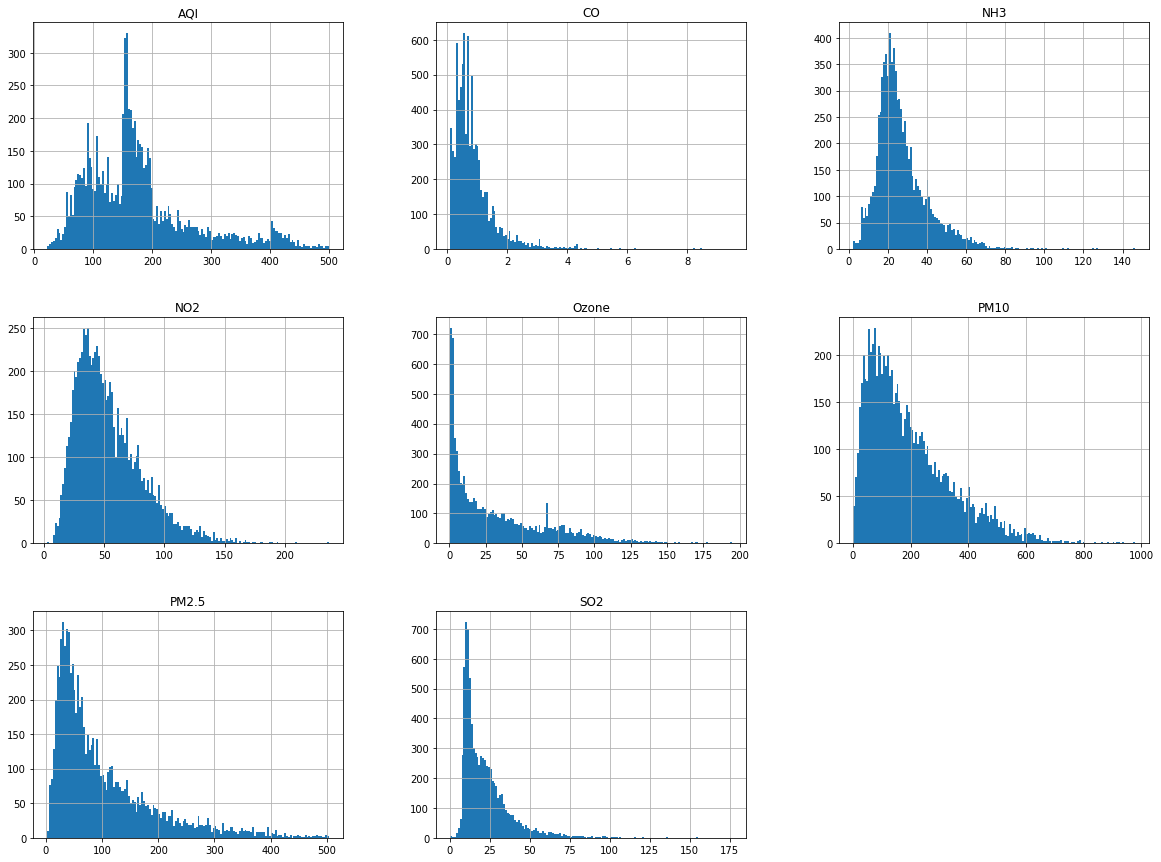

In [36]:
data.hist(bins=150,figsize=(20,15))
plt.show()

In [37]:
X = data.iloc[:,:7].values
print(X.shape)

(8276, 7)


In [38]:
y = data.iloc[:,7].values
print(y.shape)

(8276,)


# Looking For Correlation

In [39]:
corr_matrix = data.corr()
print(corr_matrix)

          PM2.5      PM10       NO2       NH3       SO2        CO     Ozone  \
PM2.5  1.000000  0.837202  0.659223  0.448552  0.266643  0.494474 -0.242746   
PM10   0.837202  1.000000  0.596702  0.310005  0.356195  0.407792 -0.159675   
NO2    0.659223  0.596702  1.000000  0.490085  0.227995  0.461277 -0.348681   
NH3    0.448552  0.310005  0.490085  1.000000  0.038073  0.242362 -0.098021   
SO2    0.266643  0.356195  0.227995  0.038073  1.000000 -0.002406  0.112305   
CO     0.494474  0.407792  0.461277  0.242362 -0.002406  1.000000 -0.297909   
Ozone -0.242746 -0.159675 -0.348681 -0.098021  0.112305 -0.297909  1.000000   
AQI    0.911473  0.942326  0.610174  0.381985  0.302196  0.443908 -0.190975   

            AQI  
PM2.5  0.911473  
PM10   0.942326  
NO2    0.610174  
NH3    0.381985  
SO2    0.302196  
CO     0.443908  
Ozone -0.190975  
AQI    1.000000  


In [40]:
corr_matrix['AQI'].sort_values(ascending=False)

AQI      1.000000
PM10     0.942326
PM2.5    0.911473
NO2      0.610174
CO       0.443908
NH3      0.381985
SO2      0.302196
Ozone   -0.190975
Name: AQI, dtype: float64

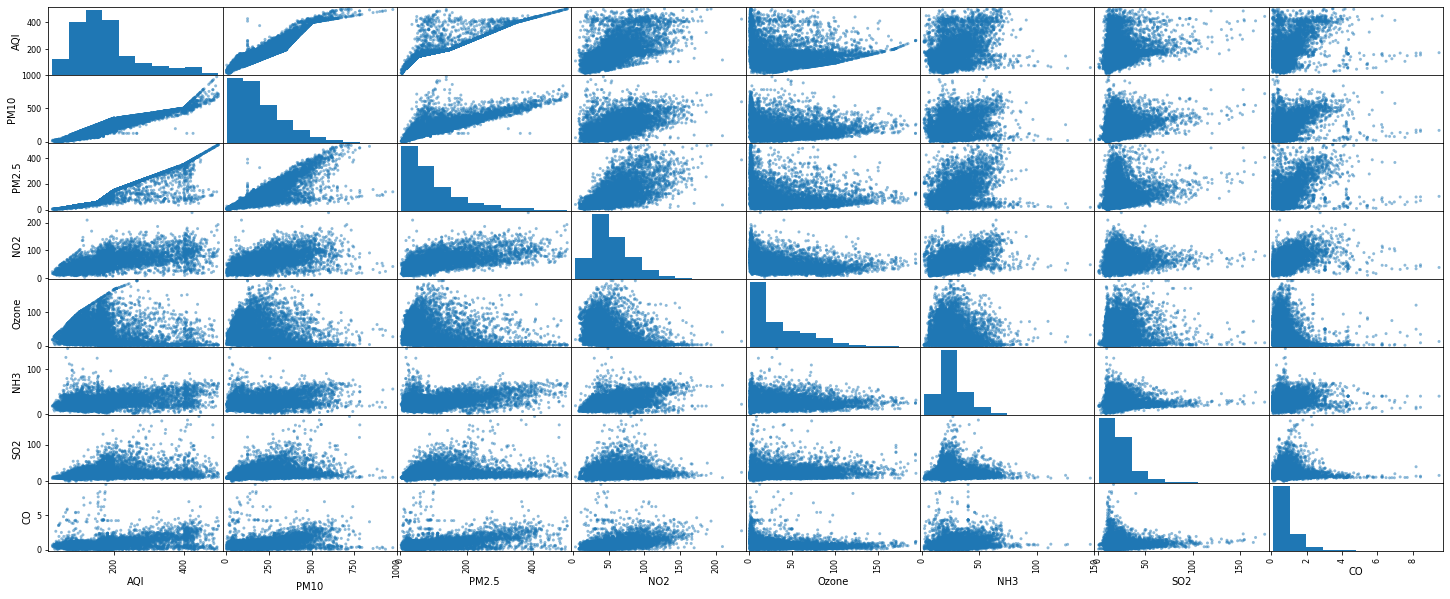

In [41]:
attributes = ['AQI','PM10','PM2.5','NO2','Ozone','NH3','SO2','CO']
scatter_matrix(data[attributes],figsize=(25,10))
plt.show()

In [42]:
data.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AQI
count,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,102.389387,195.591560,54.173304,26.880674,22.551303,0.873074,34.260748,176.119986
std,89.839470,144.190591,27.696070,12.877308,16.153126,0.732907,34.625085,91.705352
min,2.500000,1.500000,3.000000,2.200000,0.420000,0.100000,0.550000,22.000000
25%,38.250000,84.500000,33.600000,18.400000,11.570000,0.450000,5.750000,110.000000
50%,69.500000,157.750000,48.080000,23.850000,17.850000,0.700000,22.340000,160.000000
75%,138.500000,272.562500,69.120000,32.385000,28.072500,1.050000,54.080000,204.000000
max,504.000000,978.000000,236.450000,146.430000,176.450000,9.500000,194.900000,500.000000


# Split the dataset into traing and testing data

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)
print(f"Rows in train X : {len(X_train)}\nRows in train y : {len(y_train)}\nRows in test_x : {len(X_test)}\nRows in test_y : {len(y_test)}\n")

Rows in train X : 5793
Rows in train y : 5793
Rows in test_x : 2483
Rows in test_y : 2483



In [44]:
print(f"X_trian shape --> {X_train.shape}")
print(f"y_train shape --> {y_train.shape}")
print(f"X_test shape --> {X_test.shape}")
print(f"y_test shape --> {y_test.shape}")

X_trian shape --> (5793, 7)
y_train shape --> (5793,)
X_test shape --> (2483, 7)
y_test shape --> (2483,)


# Feature Scaling

In [45]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train.reshape(len(y_train),1))
# y_test = sc_y.fit_transform(y_test.reshape(len(y_test),1))

In [46]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# X_train= scale.fit_transform(X_train)
# X_test =scale.fit_transform(X_test)

# 6. Model Building and Predicting

### 1. Multiple Linear Regression

In [47]:
MLR = LinearRegression()
MLR.fit(X_train, y_train)
pred = MLR.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred - y_test) ** 2)))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred - y_test) ** 2))

print("Coefficient of determination R^2 <-- on train set: {}".format(MLR.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(MLR.score(X_test, y_test)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f ' % MLR.score(X_test, y_test))

Root Mean squared error: 22.76
Mean squared error: 517.86
Coefficient of determination R^2 <-- on train set: 0.9398858825315225
Coefficient of determination R^2 <-- on test set: 0.938894866184165
Variance score: 0.94 


### 2. Support Vector Regression

In [48]:
support_regressor = LinearSVR(C=0.6)
support_regressor.fit(X_train, y_train)
pred1 = support_regressor.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred1 - y_test) ** 2)))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred1 - y_test) ** 2))

print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % support_regressor.score(X_test, y_test))

Root Mean squared error: 27.53
Mean squared error: 757.81
Coefficient of determination R^2 <-- on train set: 0.9125227691978651
Coefficient of determination R^2 <-- on test set: 0.9105807301235809
Variance score: 0.91


C:\Users\Julfikar Sk\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 3. Decision tree regression

In [49]:
dtr = DecisionTreeRegressor(criterion='mae',random_state=0)
dtr.fit(X_train, y_train)
pred2 = dtr.predict(X_test)

# The root mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred2 - y_test) ** 2)))
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred2 - y_test) ** 2))

print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % dtr.score(X_test, y_test))

Root Mean squared error: 9.26
Mean squared error: 85.74
Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.9898825965040996
Variance score: 0.99


### 4. Lasso regression

In [50]:
# las = Lasso(alpha=1.0)
# las.fit(X_train, y_train)
# pred3 = las.predict(X_test)

# # The root mean squared error
# print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred3 - y_test) ** 2)))
# # The mean squared error
# print("Mean squared error: %.2f" % np.mean((pred3 - y_test) ** 2))

# print("Coefficient of determination R^2 <-- on train set: {}".format(las.score(X_train, y_train)))
# print("Coefficient of determination R^2 <-- on test set: {}".format(las.score(X_test, y_test)))

# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % las.score(X_test, y_test))

### 5. Ridge regression

In [51]:
# rid = Ridge(alpha=1.0)
# rid.fit(X_train, y_train)
# pred4 = rid.predict(X_test)

# # The root mean squared error
# print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred4 - y_test) ** 2)))
# # The mean squared error
# print("Mean squared error: %.2f" % np.mean((pred4 - y_test) ** 2))

# print("Coefficient of determination R^2 <-- on train set: {}".format(rid.score(X_train, y_train)))
# print("Coefficient of determination R^2 <-- on test set: {}".format(rid.score(X_test, y_test)))

# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % rid.score(X_test, y_test))

### 6. Extra Tree Regressor

In [52]:
# etr = ExtraTreesRegressor(n_estimators=300)
# etr.fit(X_train, y_train)
# pred5 = etr.predict(X_test)


# # The root mean squared error
# print("Root Mean squared error: %.2f" % np.sqrt(np.mean((pred5 - y_test) ** 2)))
# # The mean squared error
# print("Mean squared error: %.2f" % np.mean((pred5 - y_test) ** 2))

# print("Coefficient of determination R^2 <-- on train set: {}".format(etr.score(X_train, y_train)))
# print("Coefficient of determination R^2 <-- on test set: {}".format(etr.score(X_test, y_test)))

# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % rid.score(X_test, y_test))

In [53]:
print(y_test)

[153. 340. 240. ... 102. 123. 119.]


In [54]:
print(pred)

[127.39712638 335.82972027 283.62342966 ... 117.39768074 114.13575361
 101.21981366]


In [55]:
print(pred1)

[124.33694659 315.11911842 257.37700525 ... 108.35051715 107.12297928
 104.85211751]


In [56]:
print(pred2)

[153. 340. 240. ... 102. 123. 119.]


In [57]:
# print(pred3)

In [58]:
# print(pred4)

In [59]:
# print(pred5)

In [60]:
df = pd.DataFrame()

In [61]:
df

""


In [62]:
df['Original']=y_test

In [63]:
df['Multiple Linear Regression']=pred

In [64]:
df['Support Vector Regression']=pred1

In [65]:
df['Decision tree regression']=pred2

In [66]:
# df['Lasso regression']=pred3


In [67]:
# df['Ridge regression']=pred4

In [68]:
# df['Extra Tree Regressor']=pred5

In [69]:
df

,Original,Multiple Linear Regression,Support Vector Regression,Decision tree regression
0,153.0,127.397126,124.336947,153.0
1,340.0,335.829720,315.119118,340.0
2,240.0,283.623430,257.377005,240.0
3,115.0,106.992358,101.976959,115.0
4,221.0,254.481873,236.414981,221.0
...,...,...,...,...
2478,106.0,108.592750,103.842018,106.0
2479,108.0,112.481606,106.775080,108.0
2480,102.0,117.397681,108.350517,102.0
2481,123.0,114.135754,107.122979,123.0


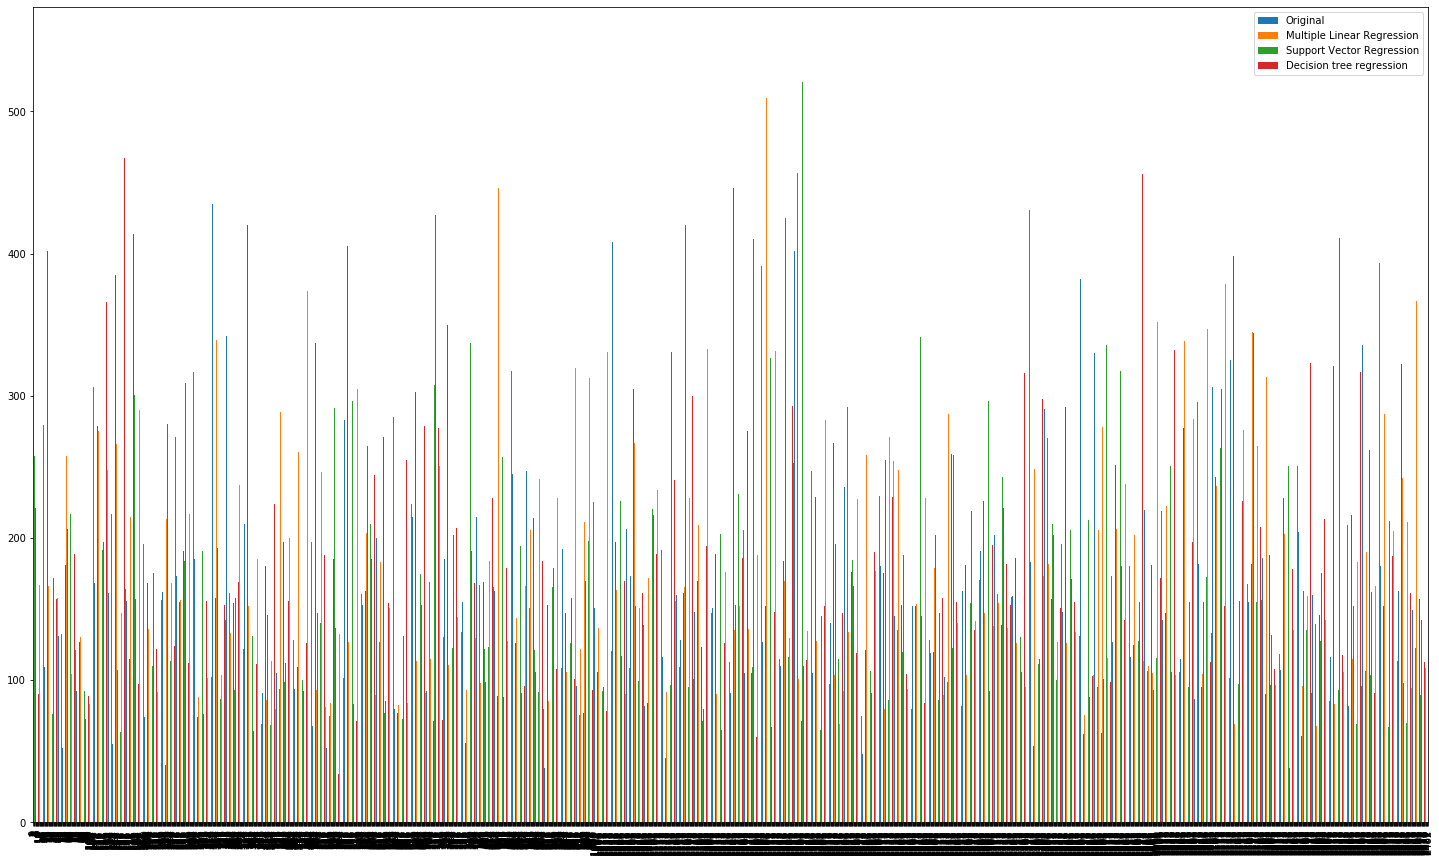

In [70]:
df.plot(kind='bar' ,figsize=(25,15))

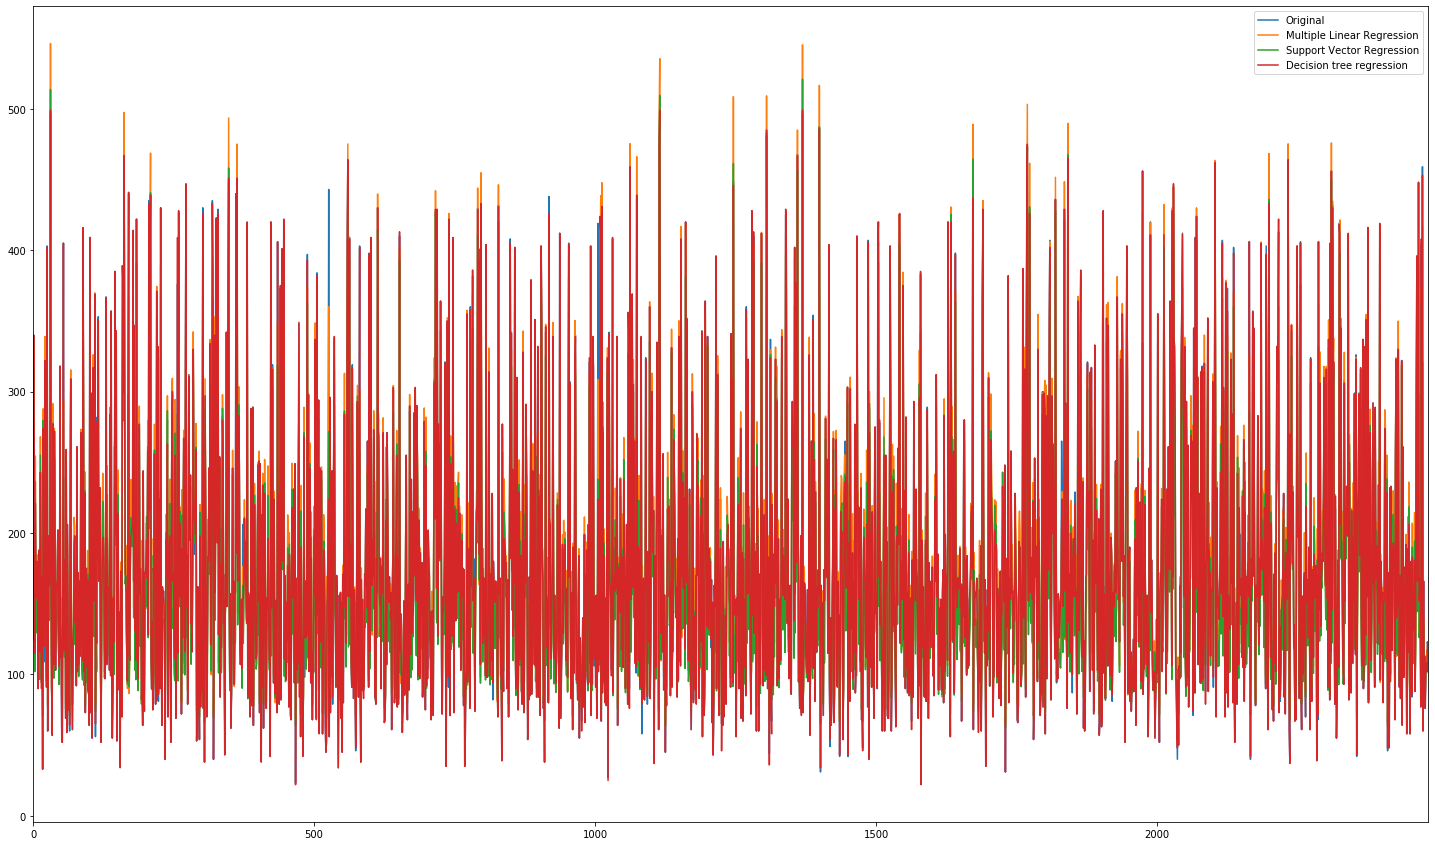

In [71]:
df.plot(kind='line' ,figsize=(25,15))

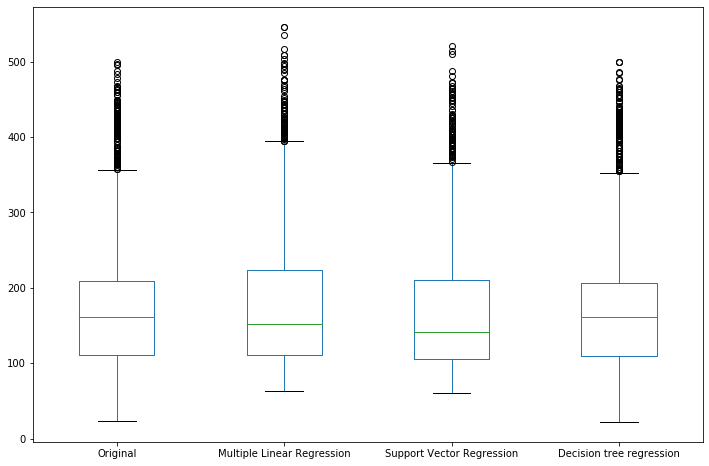

In [72]:
df.plot(kind='box' ,figsize=(12,8))